[![alt-text](img/LP-School-Of-AI-black.png)](https://www.facebook.com/groups/1204328906374103/)

# Introducción a Statistical Machine Learning
## Semana III: Regresión Lineal y Regularización 
por: [Marco Antonio Vino](https://www.linkedin.com/in/mavino)
### 3.1 Regresión lineal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from google.colab  import files  #Si estás haciendo correr este notebook desde google colab, descomenta esta línea para poder subir archivos de bases de datos 

Recordemos el planteamiento general del modelo

$$ y_i = \theta_0 + \theta_1x_{1i} + \theta_2x_{2i} + ... + \theta_kx_{ki} + \epsilon_i $$

Donde un primer caso particular (k=1) será:

$$ y_i = \theta_0 + \theta_1 x_i + \epsilon_i$$


Habíamos encontrado que la solución analítica del problema era:

$$\theta_0^* = \bar{y} - \theta_1 \bar{x}$$

$$\theta_1^* = \frac{\sum x_i y_i - \bar{y}\sum x_i}{\sum x_i^2 - \bar{x} \sum{x_i}}$$

In [2]:
def reg_lin(X,Y):
    y_prom = sum(Y)/len(Y)
    x_prom = sum(X)/len(X)
    sum_xy = sum(X*Y)
    sum_x = sum(X)
    sum_x2 = sum(X**2)
    theta1 = (sum_xy - y_prom*sum_x)/(sum_x2-x_prom*sum_x)
    theta0 = y_prom - theta1*x_prom
    return theta0, theta1

### Leyendo la base de datos 

In [3]:
## Si estás usando google colab antes de ejecutar la siguiente celda, 
# sube el archivo de la base de datos con el comando: 
# files.upload()
# (asegurate de importar la libreria files de google.colab)

In [4]:
ex1 = pd.read_csv("ejemplo1.csv",index_col=0)

In [5]:
ex1.head()
#ex1.plot.scatter("X","Y")

,X,Y
0,0.0,-1746.365473
1,1.0,352.780403
2,2.0,1169.835803
3,3.0,-228.936037
4,4.0,1011.520787


In [6]:
def smpl(df, n, semilla=123):
    np.random.seed(semilla)
    sample1 = np.random.choice(np.arange(0,df.shape[0]), size=n, replace=False)
    df_test = df.iloc[sample1,:].copy()
    df_train = df.drop(sample1).copy()
    return df_test, df_train

In [7]:
ex1_test, ex1_train = smpl(ex1,1000)

In [8]:
theta0, theta1 = reg_lin(ex1_train["X"], ex1_train["Y"])
print(theta0, theta1 )

3.13690275240333 6.704726227821975


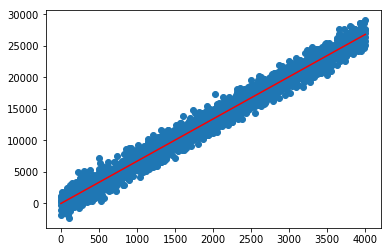

In [9]:
plt.scatter(ex1_train["X"], ex1_train["Y"])
plt.plot(ex1_train["X"], theta0 + theta1*ex1_train["X"], c="red")

# Implementación matricial

Para obtener los parámetros del modelo con $k$ variables, utilizaremos la implementación matricial.

In [10]:
ex2 = pd.read_csv("ejemplo2.csv", index_col=0)

In [11]:
ex2.head()

,Y,X1,X2,X3
0,-6.852697,-60.0,3.60000,-2.160000
1,-6.887755,-59.7,3.56409,-2.127762
2,-5.490239,-59.4,3.52836,-2.095846
3,-6.912853,-59.1,3.49281,-2.064251
4,-5.121870,-58.8,3.45744,-2.032975


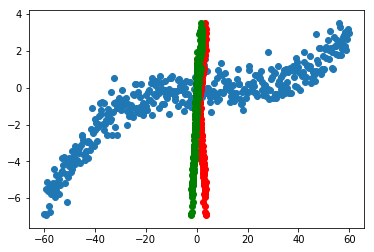

In [12]:
plt.scatter(ex2["X1"],ex2["Y"])
plt.scatter(ex2["X2"],ex2["Y"], c="r")
plt.scatter(ex2["X3"],ex2["Y"], c="g")

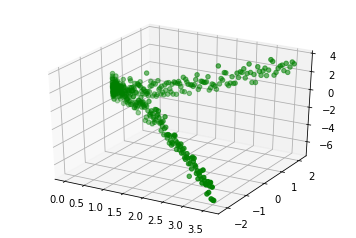

In [13]:
from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter3D(ex2["X1"],ex2["X2"],ex2["Y"], c = "r")
ax.scatter3D(ex2["X2"],ex2["X3"],ex2["Y"], c = "g")
#ax.scatter3D(ex2["X1"],ex2["X3"],ex2["Y"])


Recordadondo la notación matricial

$$ Y = X\Theta + U $$

Donde:

$Y$: Es el vector de $y_i$  $(n,1)$  

$X$: **Es una matriz  que contiene los valores de las variables para las n observaciones de dimensiones $(n,k+1)$ **

$\Theta$: Es un vector columna que contiene los valores de los parámetros de la función de dimensiones $(k+1,1)$  

$U$: Es un vector columna  de los errores para cada observación de los dimensiones $(n,1)$  

Solución analítica matricial:

$$ \Theta^* = (X'X)^{-1}X'Y$$

In [14]:
def reg_lin_Mat(X,Y):
    """
    X: Matriz de dimensiones (n,k+1) primera columna de 1
    Y: Vector de salidas
    """
    return np.linalg.inv(X.T@X)@(X.T@Y)

In [15]:
Y = ex2["Y"]
type(Y)
Y.head()

0   -6.852697
1   -6.887755
2   -5.490239
3   -6.912853
4   -5.121870
Name: Y, dtype: float64

In [16]:
Y = Y.as_matrix() ## Cambiando el tipo de datos a arrays de numpy

In [17]:
X = ex2.iloc[:,1:].copy()
X.insert(0,"X0",1) #index, name, value
X.head()

,X0,X1,X2,X3
0,1,-60.0,3.60000,-2.160000
1,1,-59.7,3.56409,-2.127762
2,1,-59.4,3.52836,-2.095846
3,1,-59.1,3.49281,-2.064251
4,1,-58.8,3.45744,-2.032975


In [18]:
X = X.as_matrix()

In [19]:
reg_lin_Mat(X,Y)

array([-0.05656091,  0.0047699 , -0.46871896,  2.08066242])

In [20]:
Theta = reg_lin_Mat(X,Y)

In [21]:
y_hat = X@Theta

In [22]:
e = Y - y_hat

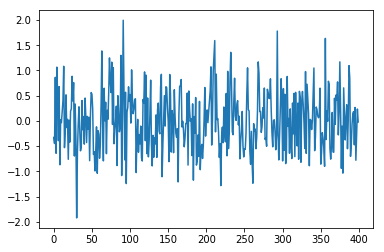

In [23]:
plt.plot(e)

# Solucion iterativa

$$\min_{\Theta} \ \  J(\Theta) =  \frac{1}{2N}\sum_{i=1}^N{[h(x_i)  -y_i]^2 } $$

### GRADIENT DESCENT

Es un algoritmo de optimización iterativo de primer orden, es decir,considera la cercania de la función a un punto óptimo, en función del valor de su primera derivada.  

* Inicializamos los Parámetros de manera aleatoria
* Por el número de iteraciones definidas. 
    * Calculamos el valor del los gradientes
    * Actualizamos los parámetros


### Inicializando el valor de los parámetros de manera aleatoria

In [24]:
np.random.seed(2018)
Theta_gd = np.random.randn(4)

In [25]:
Theta_gd

array([-0.2767676 ,  0.581851  ,  2.14839926, -1.279487  ])

### Calculamos la función de costo

$$\min_{\Theta} \ \  J(\Theta) =  \frac{1}{2N}\sum_{i=1}^N{[h(X_i)  -y_i]^2 } $$

In [26]:
def costFunc(X,Y,Theta_gd):
    """
    Calcula la función de costo con un Theta dado
    y el gradiende de la regresión lineal 
    """
    h_x = X@Theta_gd
    e2  = np.square(h_x - Y)
    J = np.sum(e2)/2*Y.shape[0]
    J_grad = (1/Y.shape[0])*(X.T@(h_x-Y))
    return J, J_grad

Obtenemos el gradiente:

$$\frac{\partial J}{\partial \theta_0} = \frac{1}{N}\sum{(h(X_i) - y_i)}$$

$$\frac{\partial J}{\partial \theta_1} = \frac{1}{N}\sum{(h(X_i) - y_i)}(x_{1i})$$

$$ \vdots$$

$$\frac{\partial J}{\partial \theta_k} = \frac{1}{N}\sum{(h(X_i) - y_i)}(x_{ki})$$

Matricialmente
$$ \nabla J = \frac{1}{N}X'(X\Theta - Y) $$

In [27]:
J , J_grad = costFunc(X,Y,Theta_gd)
J_grad

array([  2.85195708, 604.02706821,   6.27329926,  12.66909429])

### Regla de ACTUALIZACIÓN DE LOS PARÁMETROS

$$ \theta_i := \theta_i - \alpha \frac{\partial J}{\partial \theta_i}$$

In [28]:
def act_Theta(Theta,J_grad, alpha = 0.01):
    return Theta - alpha*J_grad

In [29]:
print(Theta_gd)
print(act_Theta(Theta,J_grad))

[-0.2767676   0.581851    2.14839926 -1.279487  ]
[-0.08508048 -6.03550079 -0.53145195  1.95397148]


 Uniendo las partes:

In [30]:
def gradientDescent(X,Y,Theta_gd,alpha=0.01,iteraciones=100):
    histJ = []
    J , J_grad = costFunc(X,Y,Theta_gd)
    histJ.append(J)
    for i in range(1,iteraciones+1):
        Theta_gd = act_Theta(Theta_gd,J_grad,alpha=alpha)
        J , J_grad = costFunc(X,Y,Theta_gd)
        histJ.append(J)
        if i%500 ==0:
            print("Función de costo en la iteración ", i, ": ",round(J,2))
    return Theta_gd , histJ

Función de costo en la iteración  500 :  1409020.96
Función de costo en la iteración  1000 :  1369569.86


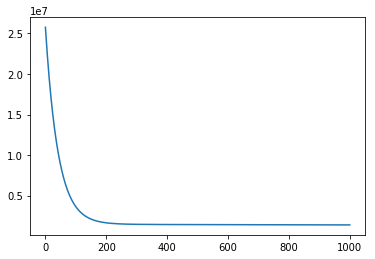

In [31]:
Theta_opt , hist_J = gradientDescent(X,Y,Theta_gd, alpha=0.00001, iteraciones=10**3)
plt.plot(hist_J)

#### ¿Qué tan cerca estamos de nuestro objetivo?

In [32]:
print(Theta_opt)
reg_lin_Mat(X,Y)

[-0.30544979  0.07863423  2.08417996 -1.2865683 ]


array([-0.05656091,  0.0047699 , -0.46871896,  2.08066242])

### Learning Rate y número de iteraciones

![alt-text](img/gradiendescent.jpg)

Función de costo en la iteración  500 :  nan
Función de costo en la iteración  1000 :  nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
/home/marco/.local/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  


[nan nan nan nan]
[-0.05656091  0.0047699  -0.46871896  2.08066242]


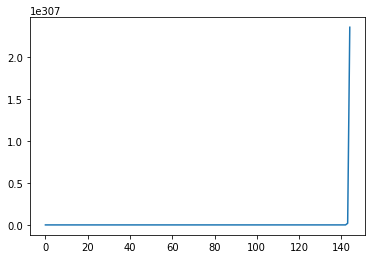

In [33]:
Theta_opt , hist_J = gradientDescent(X,Y,Theta_gd, alpha=0.01, iteraciones=10**3)
plt.plot(hist_J)
print(Theta_opt)
print(reg_lin_Mat(X,Y))

[-0.30550155  0.07863136  2.08408158 -1.28656788]
[-0.05656091  0.0047699  -0.46871896  2.08066242]


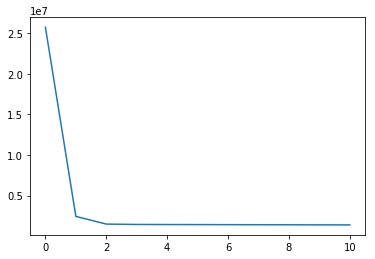

In [34]:
Theta_opt , hist_J = gradientDescent(X,Y,Theta_gd, alpha=0.001, iteraciones=10**1)
plt.plot(hist_J)
print(Theta_opt)
print(reg_lin_Mat(X,Y))

In [35]:
costFunc(X,Y,reg_lin_Mat(X,Y)) # La funcion de costo con los parámetros óptimos

(28095.224873956373,
 array([-5.32907052e-16,  2.84217094e-16, -1.42108547e-15, -5.99520433e-16]))

## OVERFITTING

![alt-text](img/overfitting.png)

Los métodos a través de los cuales podemos intentar solucionarlo, son llamdados MÉTODOS DE REGULARIZACIÓN

![alt-text](img/overfitting.jpg)

In [36]:
def gradientDescent_test(X,Y,Theta_gd,alpha=0.01,iteraciones=100):
    histJ,histT = [],[]
    J , J_grad = costFunc(X,Y,Theta_gd)
    histJ.append(J)
    for i in range(1,iteraciones+1):
        Theta_gd = act_Theta(Theta_gd,J_grad,alpha=alpha)
        histT.append(Theta_gd)
        J , J_grad = costFunc(X,Y,Theta_gd)
        histJ.append(J)
        if i%500 ==0:
            print("Función de costo en la iteración ", i, ": ",round(J,2))
    return Theta_gd , histJ, histT

#### Regularazación L1
Valor Absoluto

$$\min_{\Theta} \ \  J(\Theta) =  \frac{1}{2N}[\sum_{i=1}^N{[h(X_i)  -y_i]^2 + \lambda\sum_{j=1}
^k |\theta_j| } ]$$

* Modificamos ligeramente nuestra función objetivo, con el fin de **PENALIZAR** que los parámetros tomen un valor grande
* No penalizamos el valor de j=0 ¿Por qué?
* Parsimonia en el modelo

Obtenemos el gradiente:

$$\frac{\partial J}{\partial \theta_0} = \frac{1}{N}\sum{(h(X_i) - y_i)}$$

$$\frac{\partial J}{\partial \theta_1} = \frac{1}{N}\sum{(h(X_i) - y_i)}(x_{1i}) + \frac{\lambda}{2N} \frac{\theta_1}{|\theta_1|}$$

$$ \vdots$$

$$\frac{\partial J}{\partial \theta_k} = \frac{1}{N}\sum{(h(X_i) - y_i)}(x_{ki}) + \frac{\lambda}{2N} \frac{\theta_k}{|\theta_k|}$$

Matricialmente
$$ \nabla J = \frac{1}{N}X'(X\Theta - Y) + \vec{\frac{\lambda}{2N}} $$

In [37]:
def costFunc_L1(X,Y,Theta_gd, lam= 10):
    """
    Calcula la función de costo con un Theta dado
    y el gradiende de la regresión lineal 
    """
    J = (1/2*Y.shape[0])*((X@Theta_gd - Y).T@(X@Theta_gd - Y))
    J_grad = (1/Y.shape[0])*(X.T@(X@Theta_gd-Y)) + (lam/(2*Y.shape[0]))*(Theta_gd/abs(Theta_gd))
    return J, J_grad

In [38]:
costFunc_L1(X,Y,Theta_gd)

(25771495.568508323,
 array([  2.83945708, 604.03956821,   6.28579926,  12.65659429]))

In [39]:
costFunc(X,Y,Theta_gd)

(25771495.568508323,
 array([  2.85195708, 604.02706821,   6.27329926,  12.66909429]))

In [40]:
def gradientDescent_L1(X,Y,Theta_gd,alpha=0.01,iteraciones=100, lam=100):
    histJ, histT = [],[]
    J , J_grad = costFunc(X,Y,Theta_gd)
    histJ.append(J)
    for i in range(1,iteraciones+1):
        Theta_gd = act_Theta(Theta_gd,J_grad,alpha=alpha)
        histT.append(Theta_gd)
        J , J_grad = costFunc_L1(X,Y,Theta_gd,lam=lam)
        histJ.append(J)
        if i%500 ==0:
            print("Función de costo en la iteración ", i, ": ",round(J,2))
    return Theta_gd , histJ, histT

[-0.30550155  0.07863136  2.08408158 -1.28656788]
[ 0.07262887  0.21251809  0.96802077 -0.16188435]
[-0.05656091  0.0047699  -0.46871896  2.08066242]


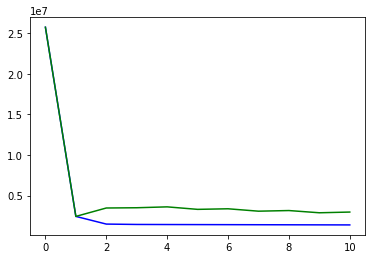

In [41]:
Theta_opt , hist_J , histT = gradientDescent_test(X,Y,Theta_gd, alpha=0.001, iteraciones=10**1)
Theta_opt_L1 , hist_J_L1 , histT_L1= gradientDescent_L1(X,Y,Theta_gd, alpha=0.001, iteraciones=10**1, lam= 10**5)
plt.plot(hist_J, c="blue")
plt.plot(hist_J_L1, c="green")
print(Theta_opt)
print(Theta_opt_L1)
print(reg_lin_Mat(X,Y))

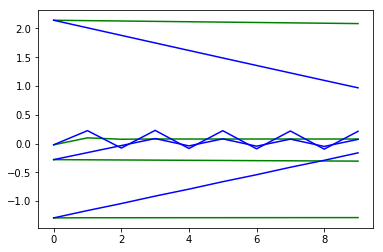

In [42]:
plt.plot(histT , c="g")
plt.plot(histT_L1, c = "b")

### Todos los demás elementos del modelo siguen funcionando de la misma manera



#### Regularazación L2
Cuadrados

$$\min_{\Theta} \ \  J(\Theta) =  \frac{1}{2N}[\sum_{i=1}^N{[h(x_i)  -y_i]^2 + \lambda\sum_{j=1}
^k \theta_j^2 } ]$$

Obtenemos el gradiente:

$$\frac{\partial J}{\partial \theta_0} = \frac{1}{N}\sum{(h(X_i) - y_i)}$$

$$\frac{\partial J}{\partial \theta_1} = \frac{1}{N}\sum{(h(X_i) - y_i)}(x_{1i}) + \frac{\lambda}{N}\theta_1$$

$$ \vdots$$

$$\frac{\partial J}{\partial \theta_k} = \frac{1}{N}\sum{(h(X_i) - y_i)}(x_{ki}) + \frac{\lambda}{N}\theta_k$$

Matricialmente
$$ \nabla J = \frac{1}{N}X'(X\Theta - Y) + \frac{\lambda}{N}\Theta $$

In [43]:
def costFunc_L2(X,Y,Theta_gd, lam= 10):
    """
    Calcula la función de costo con un Theta dado
    y el gradiende de la regresión lineal 
    """
    J = (1/2*Y.shape[0])*((X@Theta_gd - Y).T@(X@Theta_gd - Y))
    J_grad = (1/Y.shape[0])*(X.T@(X@Theta_gd-Y)) + (lam/Y.shape[0])*Theta_gd
    return J, J_grad

In [44]:
costFunc_L2(X,Y,Theta_gd)

(25771495.568508323,
 array([  2.84503789, 604.04161448,   6.32700924,  12.63710711]))

In [45]:
costFunc(X,Y,Theta_gd)

(25771495.568508323,
 array([  2.85195708, 604.02706821,   6.27329926,  12.66909429]))

In [46]:
def gradientDescent_L2(X,Y,Theta_gd,alpha=0.01,iteraciones=100, lam=100):
    histJ, histT = [],[]
    J , J_grad = costFunc(X,Y,Theta_gd)
    histJ.append(J)
    for i in range(1,iteraciones+1):
        Theta_gd = act_Theta(Theta_gd,J_grad,alpha=alpha)
        histT.append(Theta_gd)
        J , J_grad = costFunc_L2(X,Y,Theta_gd,lam=lam)
        histJ.append(J)
        if i%500 ==0:
            print("Función de costo en la iteración ", i, ": ",round(J,2))
    return Theta_gd , histJ, histT

[-0.30550155  0.07863136  2.08408158 -1.28656788]
[-0.02530896  0.04351951  0.15142932 -0.09507263]
[-0.05656091  0.0047699  -0.46871896  2.08066242]


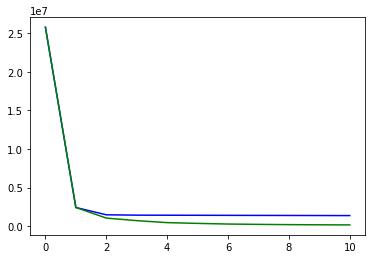

In [47]:
Theta_opt , hist_J = gradientDescent(X,Y,Theta_gd, alpha=0.001, iteraciones=10**1)
Theta_opt_L2 , hist_J_L2, histT_L2 = gradientDescent_L2(X,Y,Theta_gd, alpha=0.001, iteraciones=10**1, lam= 10**5)
plt.plot(hist_J, c="blue")
plt.plot(hist_J_L2, c="green")
print(Theta_opt)
print(Theta_opt_L2)
print(reg_lin_Mat(X,Y))

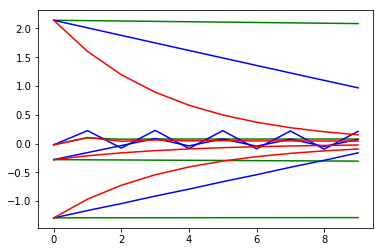

In [48]:
plt.plot(histT, c="g")
plt.plot(histT_L1, c="b")
plt.plot(histT_L2, c="r")

* En regularización L2 , los coeficientes se encogen gradualmente desde la solución no restringida hasta el origen. L2 es un método de encogimiento de coeficientes.
* En regularización L1, los coeficientes se encogen gradualmente, pero también se excluyen variables del modelo. Por eso L1 es un método de encogimiento y selección de variables. 

[![alt-text](img/cdd-lp-gray.png)](https://www.facebook.com/ccd.bolivia.bo/)